Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats

import os
from os import listdir
from os.path import isfile, join
pd.set_option('display.max_columns', 50)

In [4]:
mypath = "..\Datalogs"
files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
files

['CapitalFirmAgentDataInit_t_0.csv',
 'ConsumerFirmAgentDataInit_t_0.csv',
 'HouseholdDataInit_t_0.csv']

Read files

In [5]:
t = 0
files = [s for s in files if s.endswith(f"t_{t}.csv")]

In [6]:
household_file = os.path.join(mypath, files[2])
cons_firm_file = os.path.join(mypath, files[1])
cap_firm_file = os.path.join(mypath, files[0])

df_h = pd.read_csv(household_file)
df_cons =  pd.read_csv(cons_firm_file)
df_cap = pd.read_csv(cap_firm_file)

### QQ Plot function to check for normality

In [7]:
def plot_qq(df,col_name):
    plt.figure(figsize=(4,3))
    stats.probplot(df[col_name], dist="norm", plot=plt)
    plt.title(col_name + " Normal Distribution QQ plot")
    plt.show()
    
def plot_hist(df,col_name):
    plt.figure(figsize=(4,3))
    stats.probplot(df[col_name], dist="norm", plot=plt)
    plt.title(col_name + " Normal Distribution QQ plot")
    plt.show()

In [8]:
def plot_qq_and_hist(df,col):
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    #bin_size = int(np.ceil(np.sqrt(len(data))))
    plt.hist(df[col], bins = 'auto')
    plt.title('Histogram of {}'.format(col))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    
    plt.subplot(1,2,2)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(col + " Normal Distribution QQ plot")
    plt.show()

## Household data

In [9]:
df_h.head()

,wealth_human,expenditure_consumption,expenditure_tax,consumption_propensity,new_savings,cash_on_hand_real_desired,cash_on_hand_desired,cash_on_hand_current,saving_propensity,saving_propensity_optimist,saving_propensity_pessimist,income_current,income_average,income_wage,income_unemployment_benefit,income_gov_transfers,income_firm_owner_dividend,unemployed,reservation_wage,unemp_duration,unemp_duration_upper_bound,positive_sentiment,business_owner,c_f,c_h,c_excess_money,p_majority_op_adoption
0,9222,0,0,0.461136,0,0,0,0,0.187045,0.187045,0.287045,0,0,0,0,0,0,0,0,0,9,1,0,0.474091,0.187045,0.287045,0.198181
1,14804,0,0,0.740239,0,0,0,0,0.280080,0.280080,0.380080,0,0,0,0,0,0,0,0,0,13,1,0,0.660159,0.280080,0.380080,0.570318
2,5503,0,0,0.275156,0,0,0,0,0.125052,0.125052,0.225052,0,0,0,0,0,0,0,0,0,7,1,0,0.350104,0.125052,0.225052,0.284954
3,10524,0,0,0.526215,0,0,0,0,0.208738,0.208738,0.308738,0,0,0,0,0,0,0,0,0,10,1,0,0.517477,0.208738,0.308738,0.273853
4,10357,0,0,0.517890,0,0,0,0,0.205963,0.205963,0.305963,0,0,0,0,0,0,0,0,0,10,1,0,0.511926,0.205963,0.305963,0.189595


Get all columns that should be normally distributed (i.e. not all zeros)

In [10]:
df_h_norm = df_h.loc[:,((df_h.sum(axis=0) != 0)&(df_h.mean(axis=0) != 1))]
df_h_norm.head()

,wealth_human,consumption_propensity,saving_propensity,saving_propensity_optimist,saving_propensity_pessimist,unemp_duration_upper_bound,c_f,c_h,c_excess_money,p_majority_op_adoption
0,9222,0.461136,0.187045,0.187045,0.287045,9,0.474091,0.187045,0.287045,0.198181
1,14804,0.740239,0.280080,0.280080,0.380080,13,0.660159,0.280080,0.380080,0.570318
2,5503,0.275156,0.125052,0.125052,0.225052,7,0.350104,0.125052,0.225052,0.284954
3,10524,0.526215,0.208738,0.208738,0.308738,10,0.517477,0.208738,0.308738,0.273853
4,10357,0.517890,0.205963,0.205963,0.305963,10,0.511926,0.205963,0.305963,0.189595


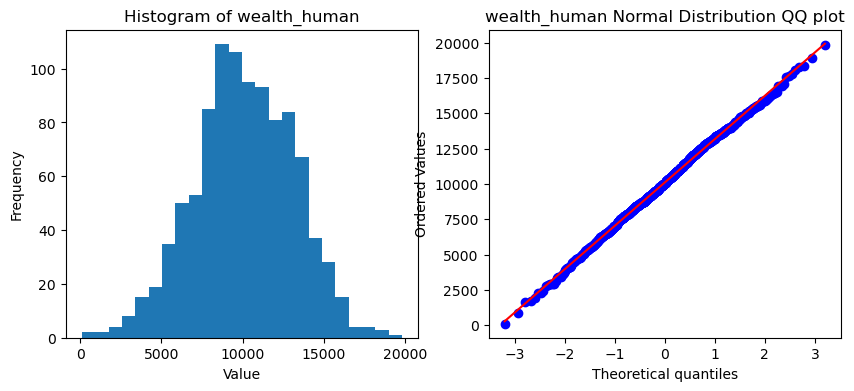

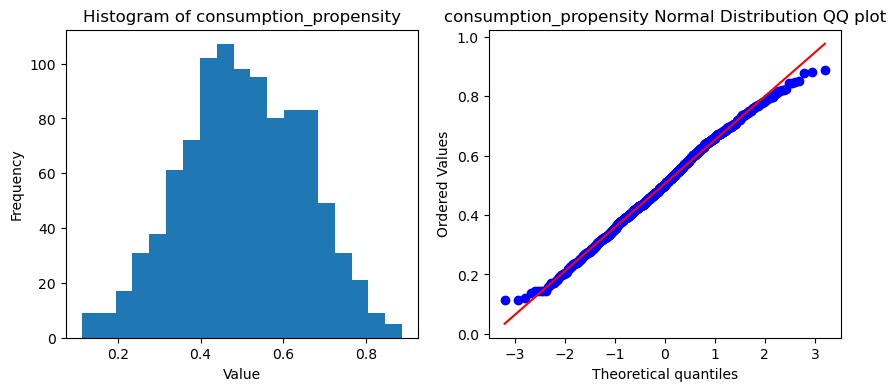

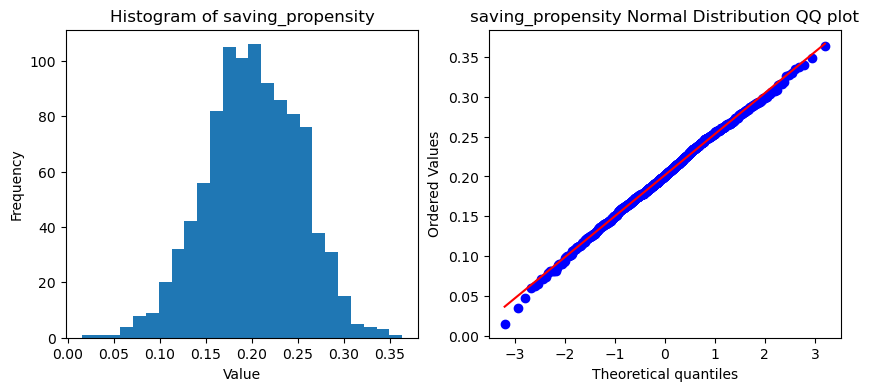

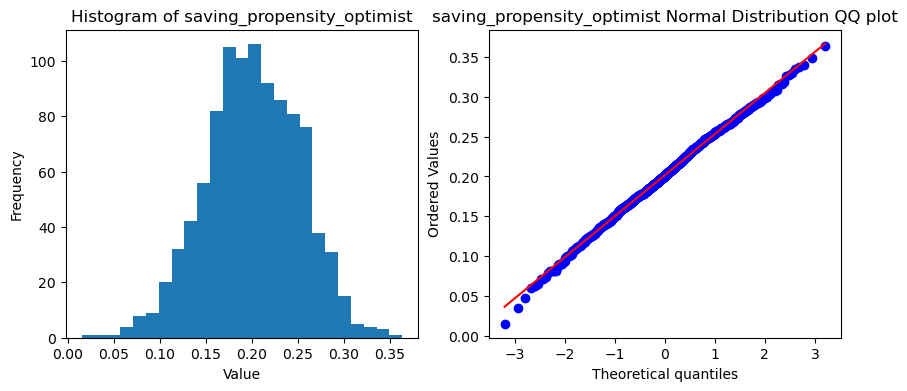

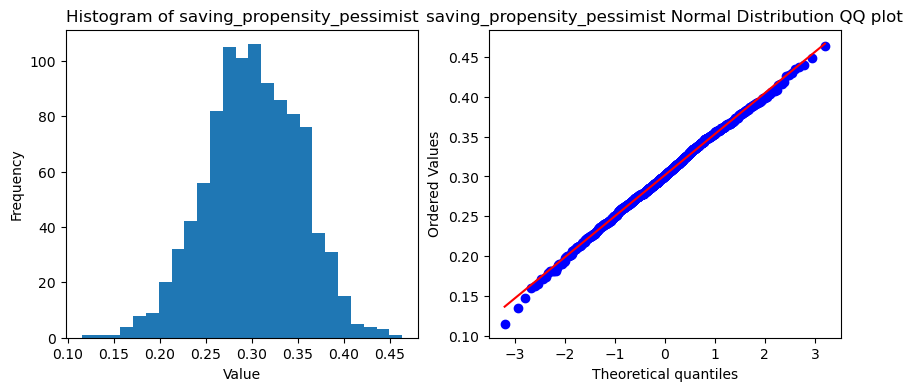

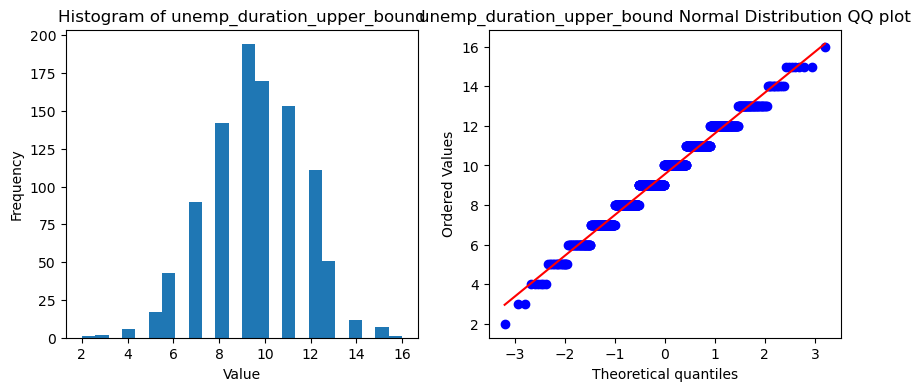

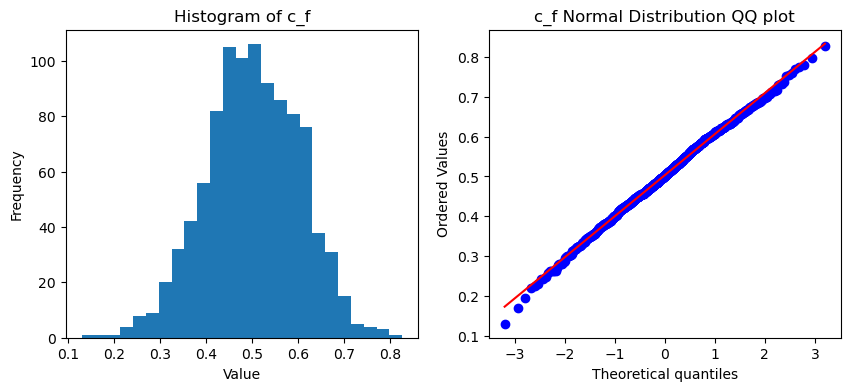

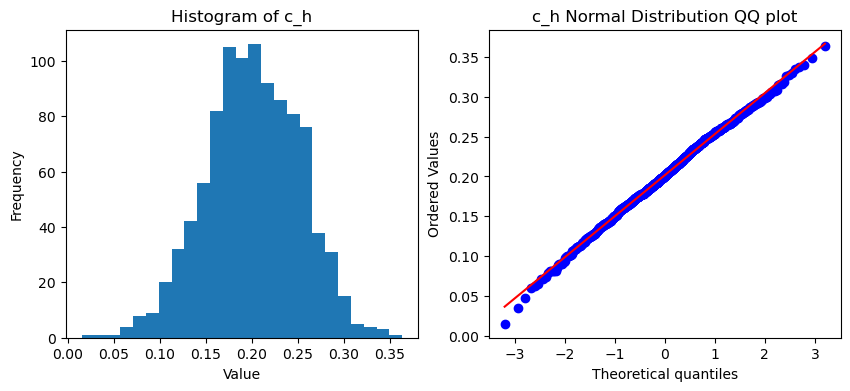

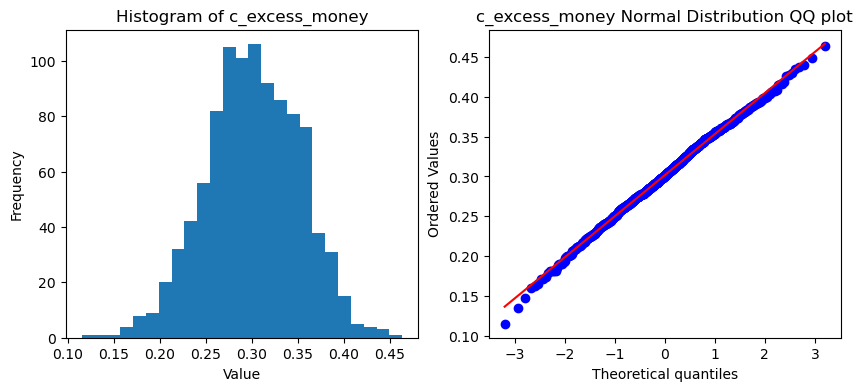

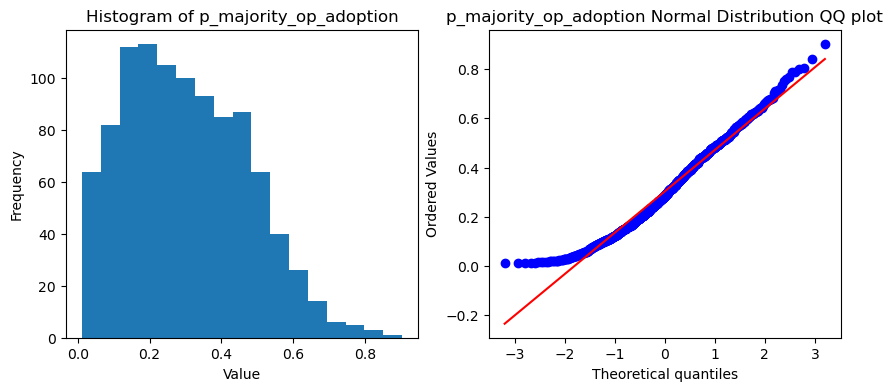

In [11]:
for col_name in df_h_norm.columns:
     plot_qq_and_hist(df_h_norm,col_name)

### Consumer Firm Data

In [12]:
df_cons.head()

,production_current,production_planned,production_past,quantity_sold,total_income,revenue_sales,new_loan_issuance,subsidies,good_price_current,good_price_past,total_liabilities,labor_wage_bill,capital_costs,tax_payments,debt_principal_payments,debt_interest_payments,dividend_payments,total_assets,leverage_ratio,cash_on_hand,dividend_ratio,dividend_ratio_optimist,dividend_ratio_pessimist,employee_count,wage_offer,employee_count_desired,n_active_job_postings,need_worker,w_target,w_current,inventory,working_capital_inventory,desired_inventory_factor,inventory_factor,sentiment,bankrupt,is_cons_firm,average_profit,average_sale_quantity,short_term_funding_gap,long_term_funding_gap,expected_wage_bill,layoff_wage_savings,expected_wage_bill_shortfall,expected_long_term_shortfall,labor_utilization,desired_inventory,inventory_reaction_factor,machine_utilization,desired_machines
0,100,974,0,90,948,948,0,0,9.48181,9.5,0,0,0,0,0,0,0,935226.0,0,935226.0,0.044818,0.044818,0.024818,0,1000,48,0,1,0,0,974,48,1.43523,0,1,0,1,948,90,0,0,0,0,0,0,0,0,1,0,0
1,100,1160,0,90,1320,1320,0,0,13.20320,9.5,0,0,0,0,0,0,0,1400400.0,0,1400400.0,0.082032,0.082032,0.062032,0,2000,58,0,1,0,0,1160,58,1.90040,0,1,0,1,1320,90,0,0,0,0,0,0,0,0,1,0,0
2,100,850,0,90,700,700,0,0,7.00208,9.5,0,0,0,0,0,0,0,625259.0,0,625259.0,0.020021,0.020021,0.033495,0,3000,42,0,1,0,0,850,42,1.12526,0,1,0,1,700,90,0,0,0,0,0,0,0,0,1,0,0
3,100,1017,0,90,1034,1034,0,0,10.34950,9.5,0,0,0,0,0,0,0,1043690.0,0,1043690.0,0.053495,0.053495,0.032385,0,4000,50,0,1,0,0,1017,50,1.54369,0,1,0,1,1034,90,0,0,0,0,0,0,0,0,1,0,0
4,100,1011,0,90,1023,1023,0,0,10.23850,9.5,0,0,0,0,0,0,0,1029820.0,0,1029820.0,0.052385,0.052385,0.023960,0,5000,50,0,1,0,0,1011,50,1.52982,0,1,0,1,1023,90,0,0,0,0,0,0,0,0,1,0,0


In [13]:
df_cons.describe()

,production_current,production_planned,production_past,quantity_sold,total_income,revenue_sales,new_loan_issuance,subsidies,good_price_current,good_price_past,total_liabilities,labor_wage_bill,capital_costs,tax_payments,debt_principal_payments,debt_interest_payments,dividend_payments,total_assets,leverage_ratio,cash_on_hand,dividend_ratio,dividend_ratio_optimist,dividend_ratio_pessimist,employee_count,wage_offer,employee_count_desired,n_active_job_postings,need_worker,w_target,w_current,inventory,working_capital_inventory,desired_inventory_factor,inventory_factor,sentiment,bankrupt,is_cons_firm,average_profit,average_sale_quantity,short_term_funding_gap,long_term_funding_gap,expected_wage_bill,layoff_wage_savings,expected_wage_bill_shortfall,expected_long_term_shortfall,labor_utilization,desired_inventory,inventory_reaction_factor,machine_utilization,desired_machines
count,50.0,50.000000,50.0,50.0,50.00000,50.00000,50.0,50.0,50.000000,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,5.000000e+01,50.0,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.0,50.0,50.0,50.000000,50.000000,50.000000,50.0,50.0,50.0,50.0,50.00000,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0,50.0
mean,100.0,1003.900000,0.0,90.0,1008.30000,1008.30000,0.0,0.0,10.087667,9.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.010959e+06,0.0,1.010959e+06,0.051823,0.051823,0.033758,10.300000,25500.000000,49.700000,0.0,1.0,0.0,0.0,1003.900000,49.700000,1.510959,0.0,1.0,0.0,1.0,1008.30000,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
std,0.0,93.207088,0.0,0.0,186.38059,186.38059,0.0,0.0,1.864171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.330221e+05,0.0,2.330221e+05,0.017293,0.017293,0.014730,19.745576,14577.379737,4.674071,0.0,0.0,0.0,0.0,93.207088,4.674071,0.233022,0.0,0.0,0.0,0.0,186.38059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,100.0,763.000000,0.0,90.0,526.00000,526.00000,0.0,0.0,5.260320,9.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.075400e+05,0.0,4.075400e+05,0.009918,0.009918,0.009054,0.000000,1000.000000,38.000000,0.0,1.0,0.0,0.0,763.000000,38.000000,0.907540,0.0,1.0,0.0,1.0,526.00000,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25%,100.0,937.250000,0.0,90.0,874.50000,874.50000,0.0,0.0,8.750757,9.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.438438e+05,0.0,8.438438e+05,0.038820,0.038820,0.022165,0.000000,13250.000000,46.250000,0.0,1.0,0.0,0.0,937.250000,46.250000,1.343848,0.0,1.0,0.0,1.0,874.50000,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50%,100.0,1012.500000,0.0,90.0,1026.00000,1026.00000,0.0,0.0,10.264600,9.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.033080e+06,0.0,1.033080e+06,0.052646,0.052646,0.033201,0.000000,25500.000000,50.000000,0.0,1.0,0.0,0.0,1012.500000,50.000000,1.533080,0.0,1.0,0.0,1.0,1026.00000,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75%,100.0,1069.500000,0.0,90.0,1139.00000,1139.00000,0.0,0.0,11.395250,9.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.174408e+06,0.0,1.174408e+06,0.063952,0.063952,0.043952,0.000000,37750.000000,53.000000,0.0,1.0,0.0,0.0,1069.500000,53.000000,1.674408,0.0,1.0,0.0,1.0,1139.00000,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
max,100.0,1173.000000,0.0,90.0,1346.00000,1346.00000,0.0,0.0,13.462500,9.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.432820e+06,0.0,1.432820e+06,0.084625,0.084625,0.064625,54.000000,50000.000000,58.000000,0.0,1.0,0.0,0.0,1173.000000,58.000000,1.932820,0.0,1.0,0.0,1.0,1346.00000,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


- Values not properly initialized

Select normally distributed columns

In [14]:
df_cons_norm = df_cons.loc[:,((df_cons.mean(axis=0) < 999999)&(df_cons.sum(axis=0) !=0))]
print(len(df_cons_norm.columns), " columns")
print("Consumer Firm Data at t= 0")
df_cons_norm.head()

22  columns
Consumer Firm Data at t= 0


,production_current,production_planned,quantity_sold,total_income,revenue_sales,good_price_current,good_price_past,dividend_ratio,dividend_ratio_optimist,dividend_ratio_pessimist,employee_count,wage_offer,employee_count_desired,need_worker,inventory,working_capital_inventory,desired_inventory_factor,sentiment,is_cons_firm,average_profit,average_sale_quantity,inventory_reaction_factor
0,100,974,90,948,948,9.48181,9.5,0.044818,0.044818,0.024818,0,1000,48,1,974,48,1.43523,1,1,948,90,1
1,100,1160,90,1320,1320,13.20320,9.5,0.082032,0.082032,0.062032,0,2000,58,1,1160,58,1.90040,1,1,1320,90,1
2,100,850,90,700,700,7.00208,9.5,0.020021,0.020021,0.033495,0,3000,42,1,850,42,1.12526,1,1,700,90,1
3,100,1017,90,1034,1034,10.34950,9.5,0.053495,0.053495,0.032385,0,4000,50,1,1017,50,1.54369,1,1,1034,90,1
4,100,1011,90,1023,1023,10.23850,9.5,0.052385,0.052385,0.023960,0,5000,50,1,1011,50,1.52982,1,1,1023,90,1


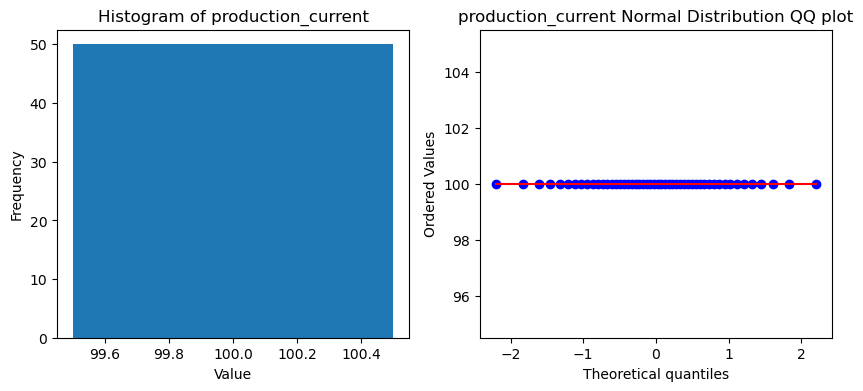

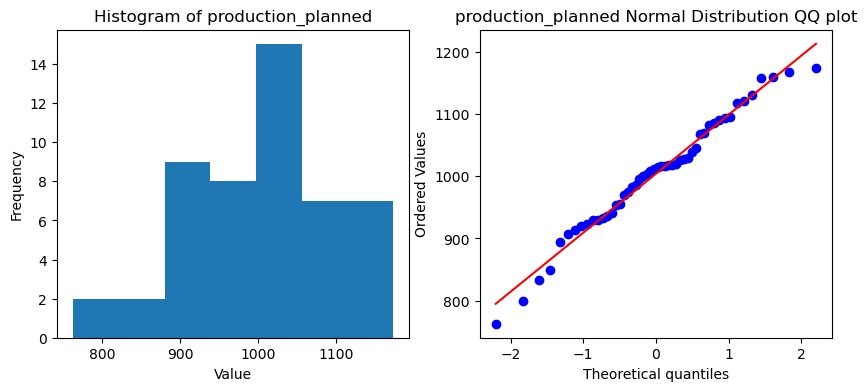

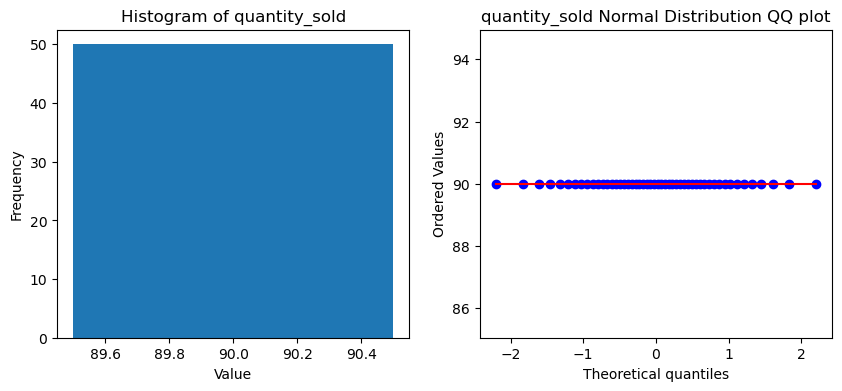

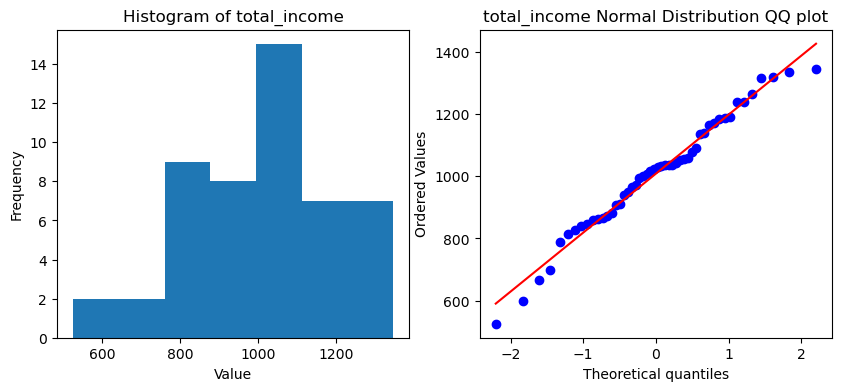

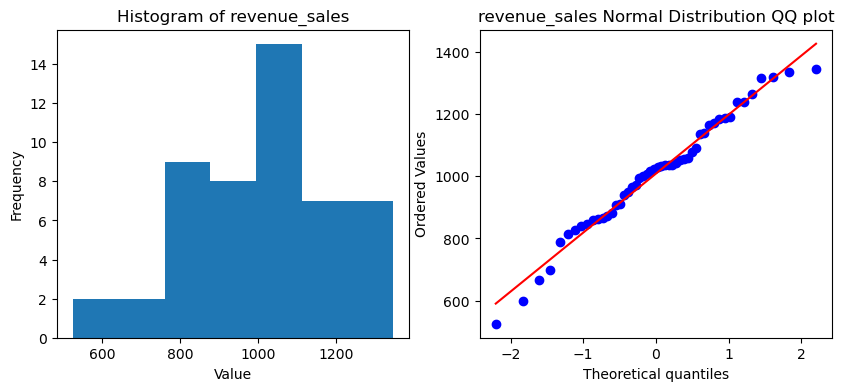

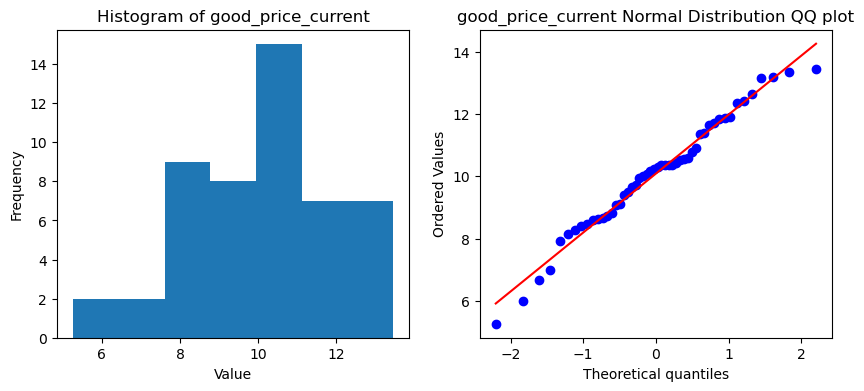

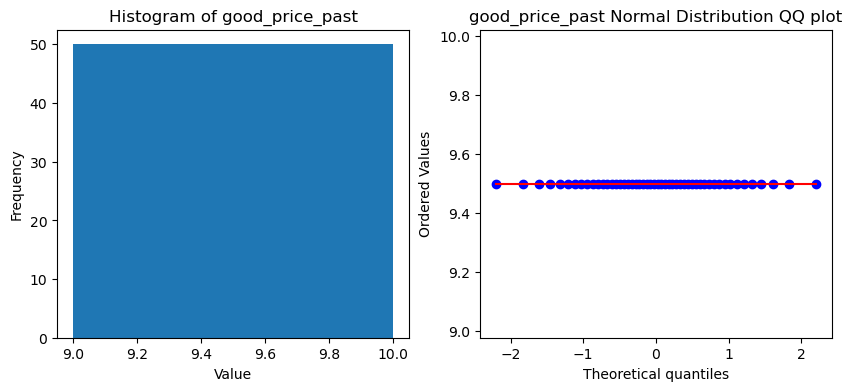

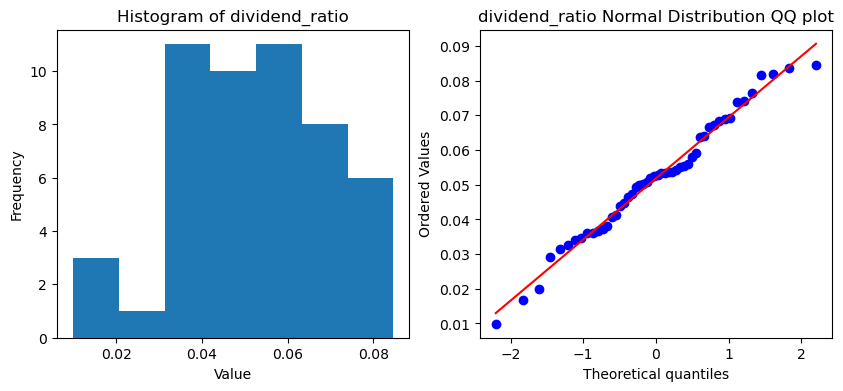

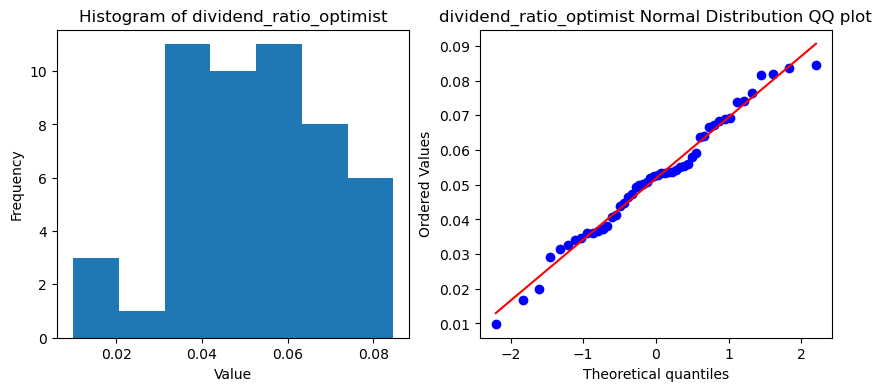

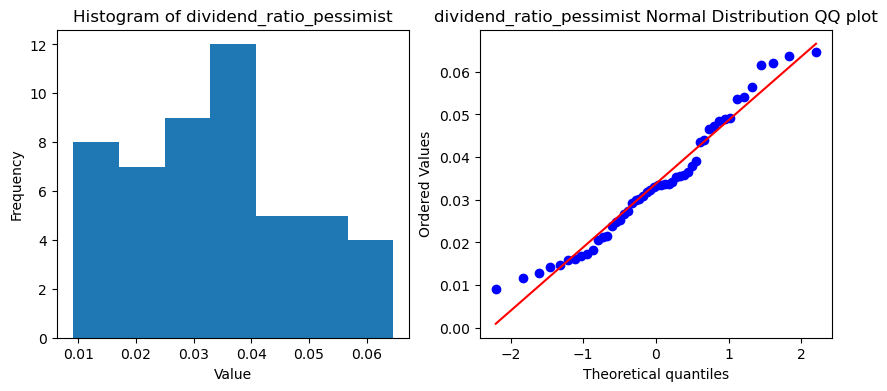

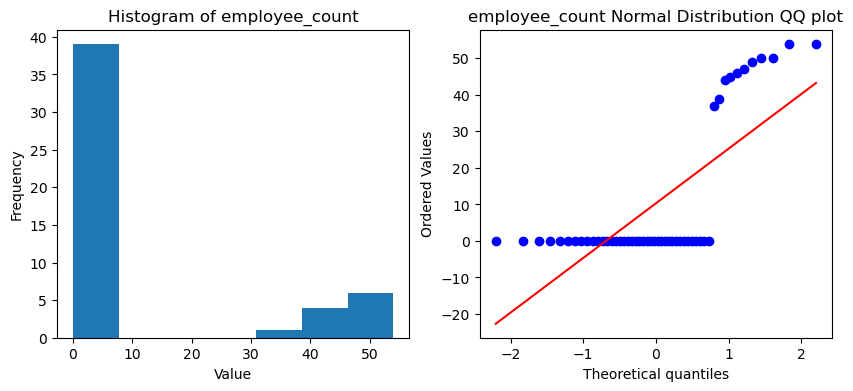

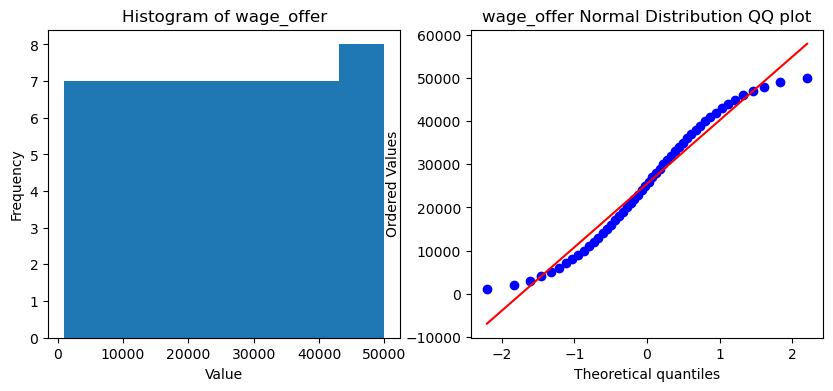

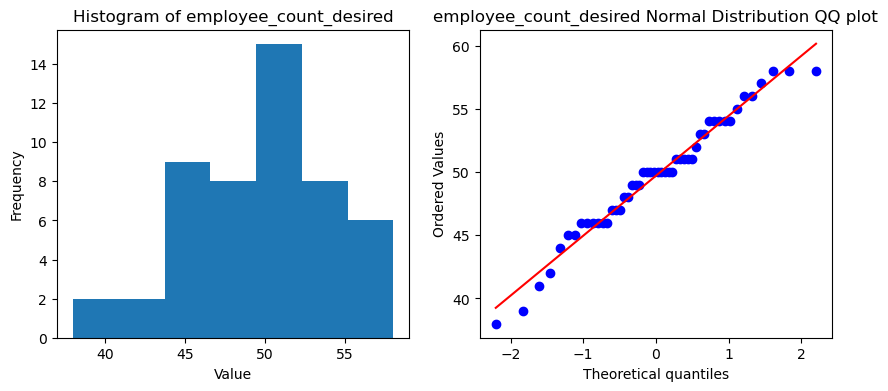

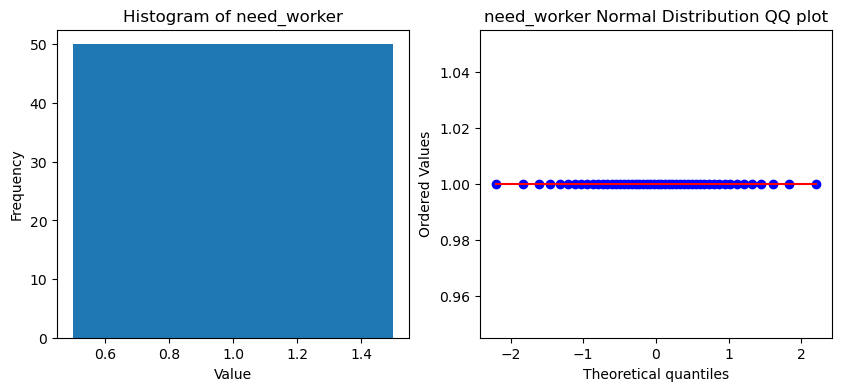

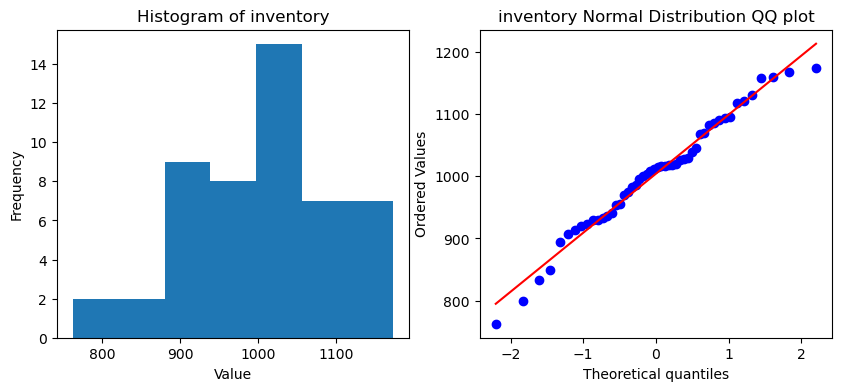

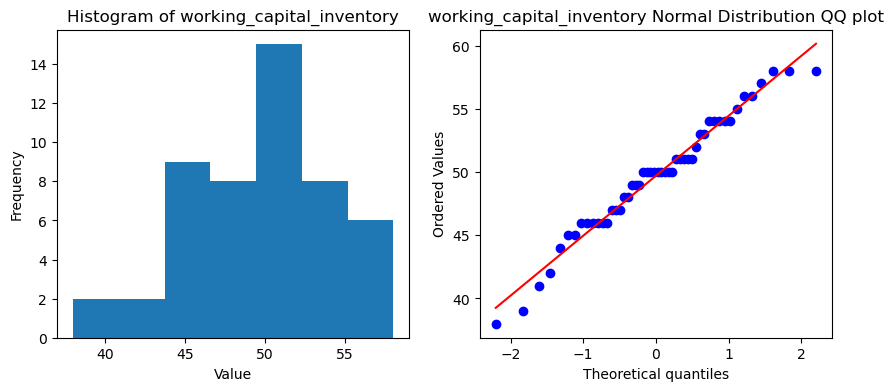

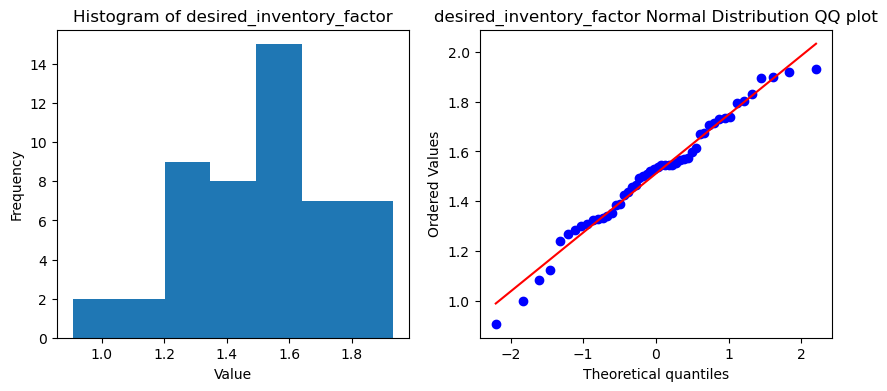

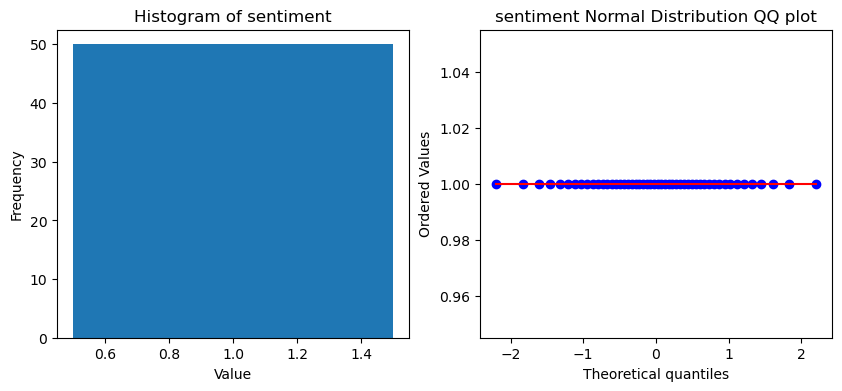

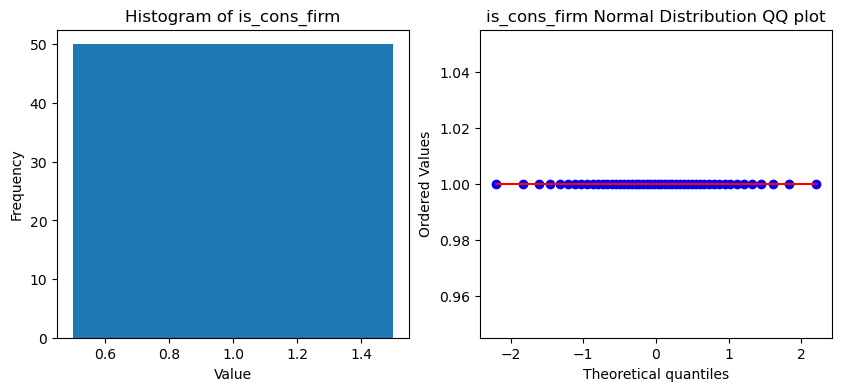

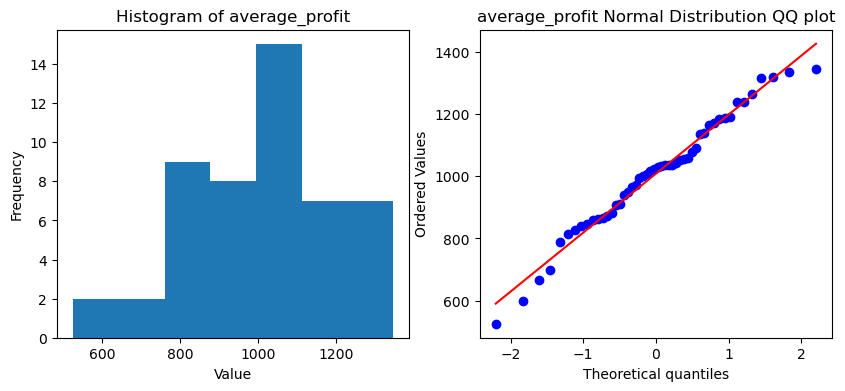

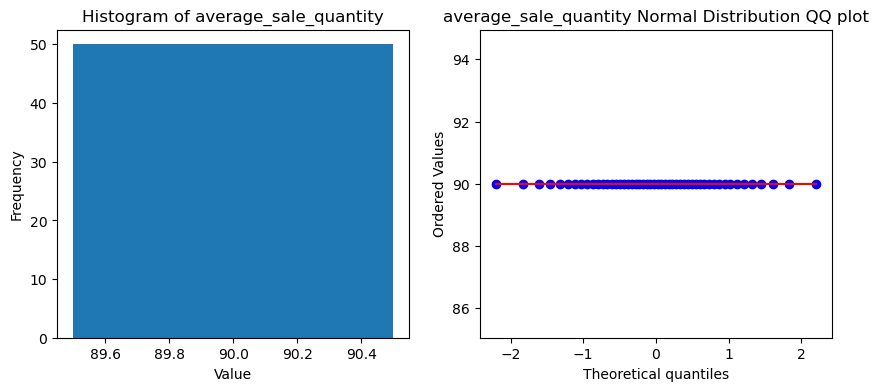

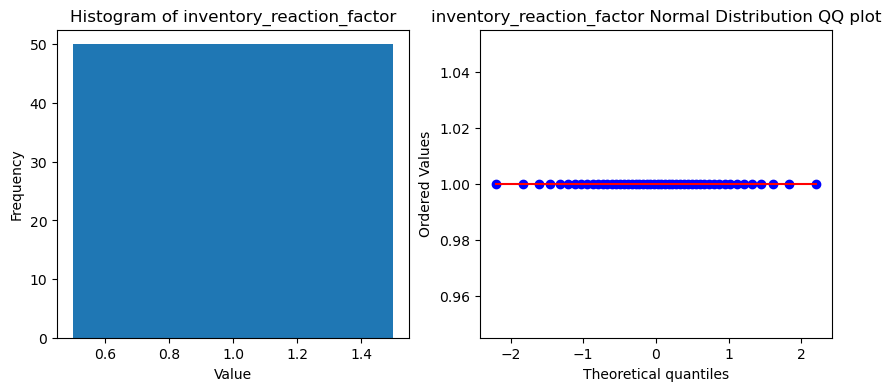

In [15]:
for col_name in df_cons_norm.columns:
     plot_qq_and_hist(df_cons_norm,col_name)

### Capital Firm Data

In [9]:
df_cap.head()

,production_current,production_planned,production_past,quantity_sold,total_income,revenue_sales,new_loan_issuance,subsidies,good_price_current,good_price_past,total_liabilities,labor_wage_bill,capital_costs,tax_payments,debt_principal_payments,debt_interest_payments,dividend_payments,total_assets,leverage_ratio,cash_on_hand,dividend_ratio,dividend_ratio_optimist,dividend_ratio_pessimist,employee_count,wage_offer,employee_count_desired,n_active_job_postings,need_worker,w_target,w_current,inventory,working_capital_inventory,desired_inventory_factor,inventory_factor,sentiment,bankrupt,is_cons_firm,average_profit,average_sale_quantity,short_term_funding_gap,long_term_funding_gap,expected_wage_bill,layoff_wage_savings,expected_wage_bill_shortfall,expected_long_term_shortfall,labor_utilization,desired_inventory,inventory_reaction_factor,machine_utilization,desired_machines
0,0,974,0,0,0,0,0,0,9.48181,0,0,0,0,0,0,0,0,935226.0,0,935226.0,0.044818,0.044818,0.024818,48,1000,48,0,1,0,0,974,48,1.43523,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1160,0,0,0,0,0,0,13.20320,0,0,0,0,0,0,0,0,1400400.0,0,1400400.0,0.082032,0.082032,0.062032,58,2000,58,0,1,0,0,1160,58,1.90040,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,850,0,0,0,0,0,0,7.00208,0,0,0,0,0,0,0,0,625259.0,0,625259.0,0.020021,0.020021,0.033495,42,3000,42,0,1,0,0,850,42,1.12526,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1017,0,0,0,0,0,0,10.34950,0,0,0,0,0,0,0,0,1043690.0,0,1043690.0,0.053495,0.053495,0.032385,50,4000,50,0,1,0,0,1017,50,1.54369,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1011,0,0,0,0,0,0,10.23850,0,0,0,0,0,0,0,0,1029820.0,0,1029820.0,0.052385,0.052385,0.023960,50,5000,50,0,1,0,0,1011,50,1.52982,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [10]:
df_cap.describe()

,production_current,production_planned,production_past,quantity_sold,total_income,revenue_sales,new_loan_issuance,subsidies,good_price_current,good_price_past,total_liabilities,labor_wage_bill,capital_costs,tax_payments,debt_principal_payments,debt_interest_payments,dividend_payments,total_assets,leverage_ratio,cash_on_hand,dividend_ratio,dividend_ratio_optimist,dividend_ratio_pessimist,employee_count,wage_offer,employee_count_desired,n_active_job_postings,need_worker,w_target,w_current,inventory,working_capital_inventory,desired_inventory_factor,inventory_factor,sentiment,bankrupt,is_cons_firm,average_profit,average_sale_quantity,short_term_funding_gap,long_term_funding_gap,expected_wage_bill,layoff_wage_savings,expected_wage_bill_shortfall,expected_long_term_shortfall,labor_utilization,desired_inventory,inventory_reaction_factor,machine_utilization,desired_machines
count,100.0,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1.000000e+02,100.0,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.0,100.000000,100.000000,100.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
mean,0.0,1000.960000,0.0,0.0,0.0,0.0,0.0,0.0,10.029762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.003720e+06,0.0,1.003720e+06,0.051346,0.051346,0.033775,49.540000,50500.000000,49.540000,0.0,1.0,0.0,0.0,1000.960000,49.540000,1.503721,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
std,0.0,101.689756,0.0,0.0,0.0,0.0,0.0,0.0,2.034682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.543354e+05,0.0,2.543354e+05,0.018874,0.018874,0.016441,5.048092,29011.491976,5.048092,0.0,0.0,0.0,0.0,101.689756,5.048092,0.254335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,758.000000,0.0,0.0,0.0,0.0,0.0,0.0,5.163190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.953980e+05,0.0,3.953980e+05,0.006231,0.006231,0.006347,37.000000,1000.000000,37.000000,0.0,1.0,0.0,0.0,758.000000,37.000000,0.895399,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25%,0.0,941.000000,0.0,0.0,0.0,0.0,0.0,0.0,8.834435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.543040e+05,0.0,8.543040e+05,0.038665,0.038665,0.021082,47.000000,25750.000000,47.000000,0.0,1.0,0.0,0.0,941.000000,47.000000,1.354303,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50%,0.0,1008.500000,0.0,0.0,0.0,0.0,0.0,0.0,10.180900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.022615e+06,0.0,1.022615e+06,0.052129,0.052129,0.033201,50.000000,50500.000000,50.000000,0.0,1.0,0.0,0.0,1008.500000,50.000000,1.522615,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75%,0.0,1071.000000,0.0,0.0,0.0,0.0,0.0,0.0,11.425950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.178245e+06,0.0,1.178245e+06,0.064260,0.064260,0.044973,53.000000,75250.000000,53.000000,0.0,1.0,0.0,0.0,1071.000000,53.000000,1.678245,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
max,0.0,1326.000000,0.0,0.0,0.0,0.0,0.0,0.0,16.534800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.816840e+06,0.0,1.816840e+06,0.115348,0.115348,0.095348,66.000000,100000.000000,66.000000,0.0,1.0,0.0,0.0,1326.000000,66.000000,2.316840,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


- **Some values which should have been set to zero take random large values, check this!**

In [18]:
df_cap_norm = df_cap.loc[:,((df_cap.sum(axis=0) !=0)& (df_cap.mean(axis=0) != 1))]
print(len(df_cap_norm.columns), " columns")
df_cap_norm.head()

13  columns


,production_planned,good_price_current,total_assets,cash_on_hand,dividend_ratio,dividend_ratio_optimist,dividend_ratio_pessimist,employee_count,wage_offer,employee_count_desired,inventory,working_capital_inventory,desired_inventory_factor
0,974,9.48181,935226.0,935226.0,0.044818,0.044818,0.024818,48,1000,48,974,48,1.43523
1,1160,13.20320,1400400.0,1400400.0,0.082032,0.082032,0.062032,58,2000,58,1160,58,1.90040
2,850,7.00208,625259.0,625259.0,0.020021,0.020021,0.033495,42,3000,42,850,42,1.12526
3,1017,10.34950,1043690.0,1043690.0,0.053495,0.053495,0.032385,50,4000,50,1017,50,1.54369
4,1011,10.23850,1029820.0,1029820.0,0.052385,0.052385,0.023960,50,5000,50,1011,50,1.52982


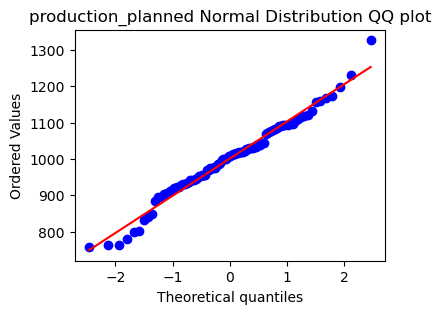

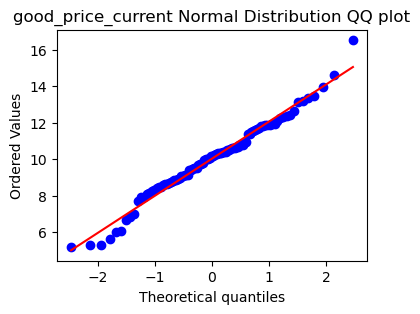

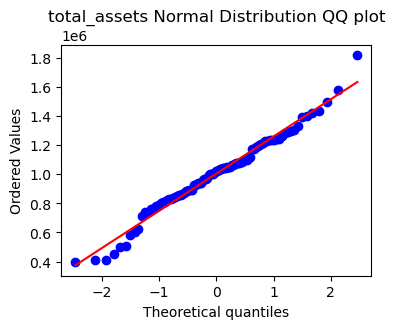

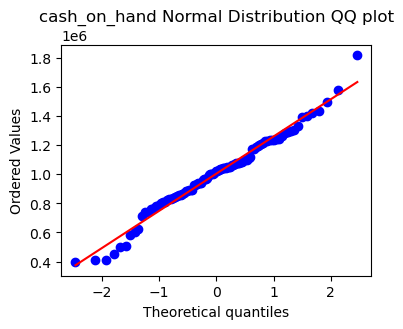

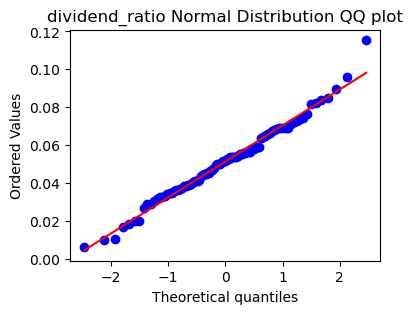

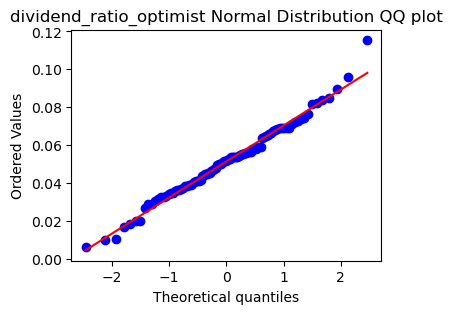

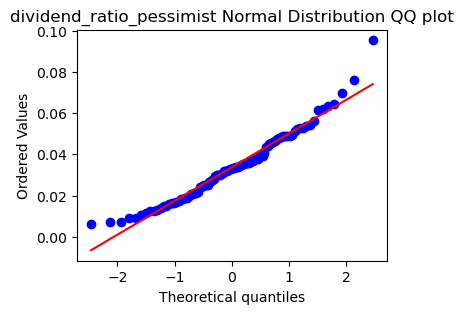

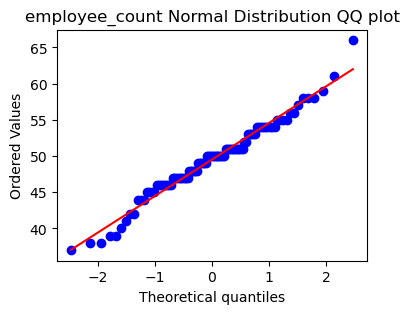

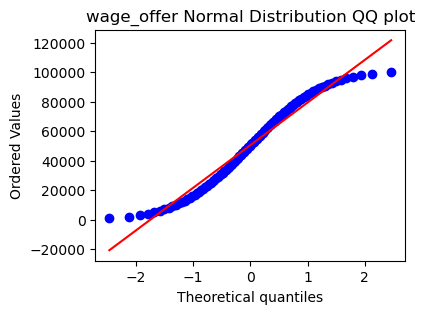

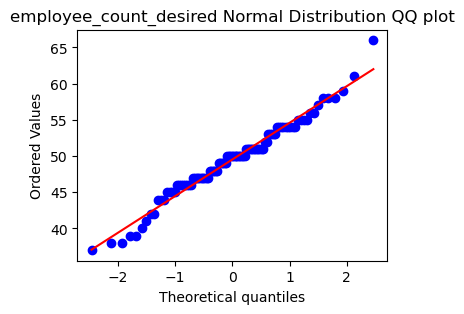

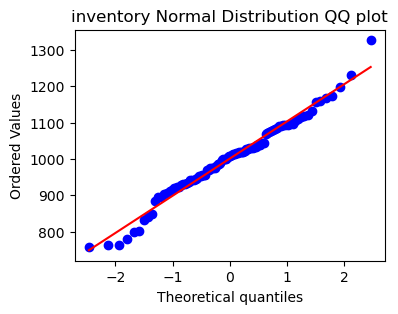

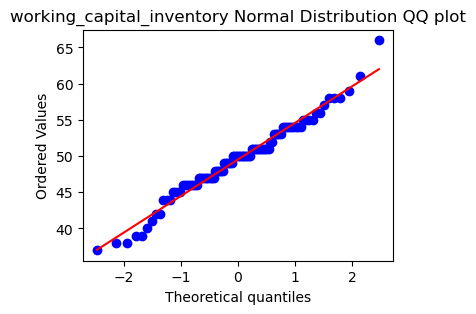

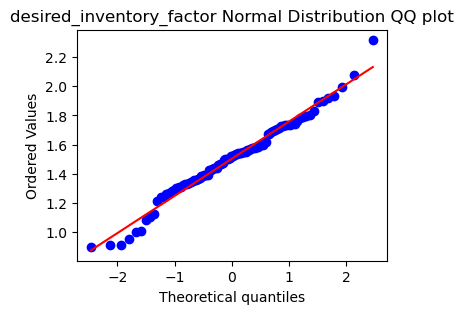

In [19]:
for col_name in df_cap_norm.columns:
    plot_qq(df_cap_norm,col_name)

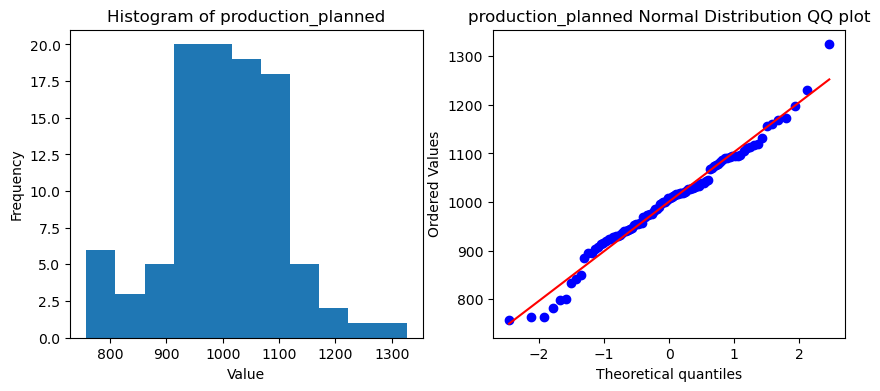

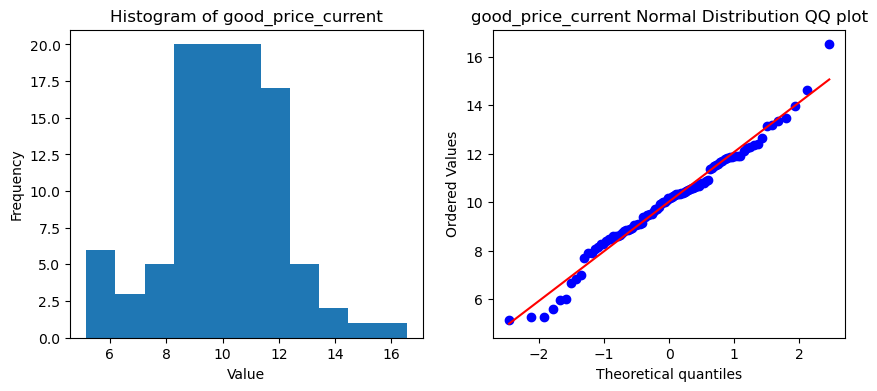

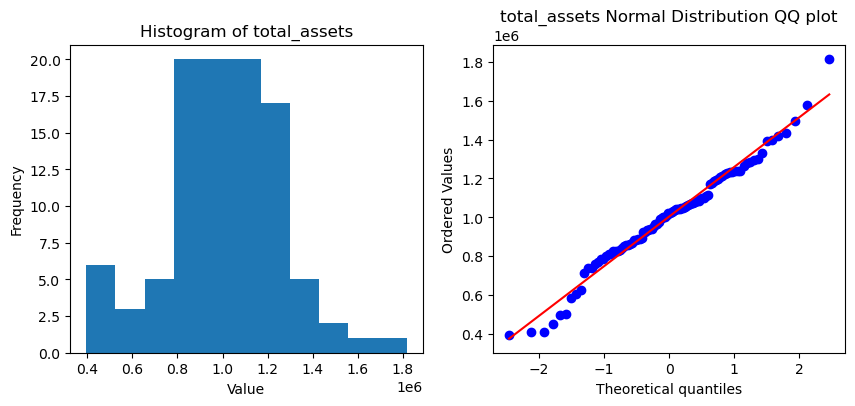

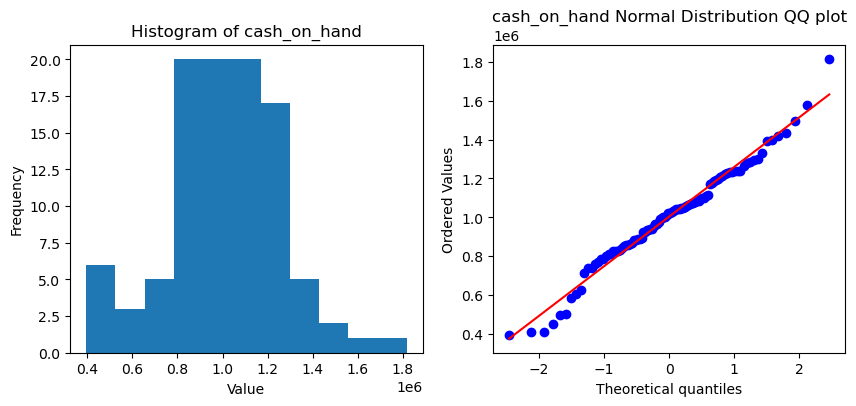

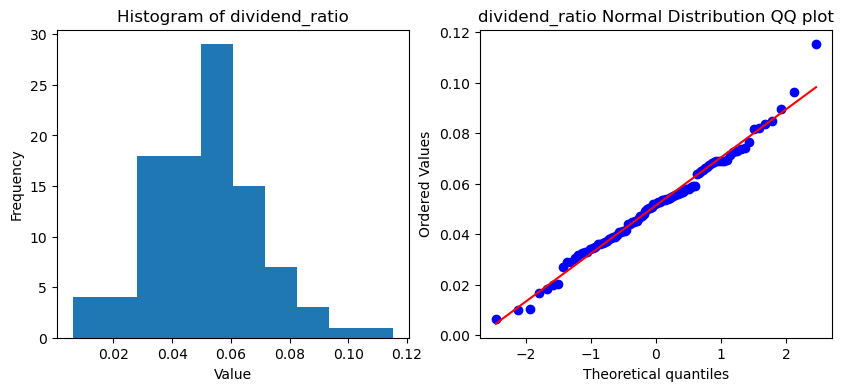

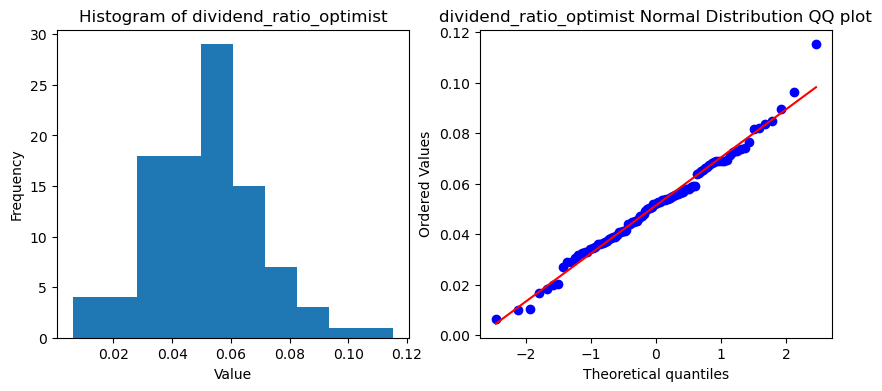

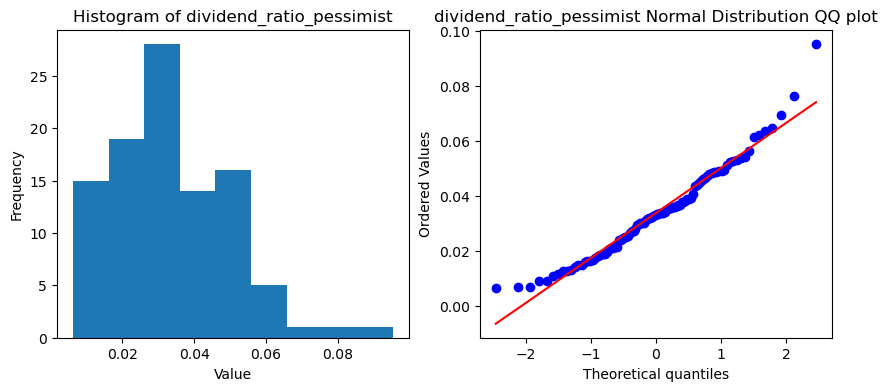

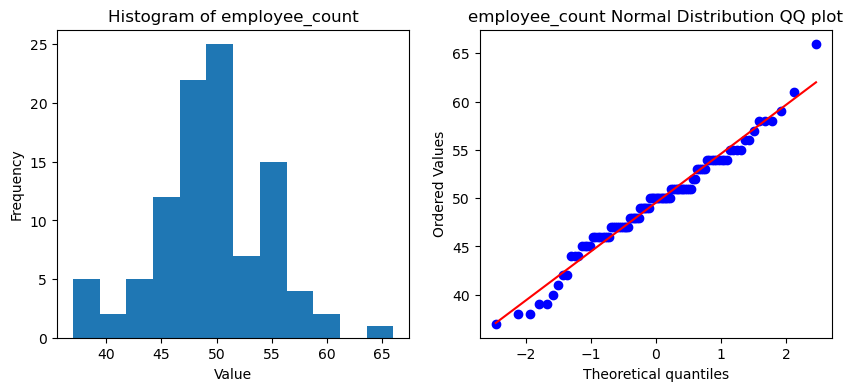

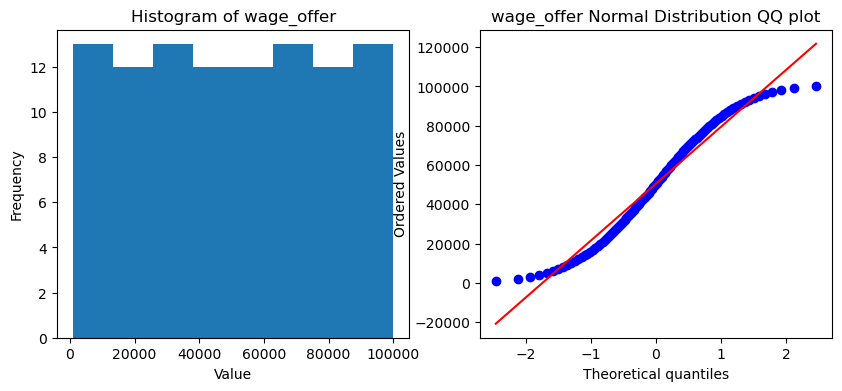

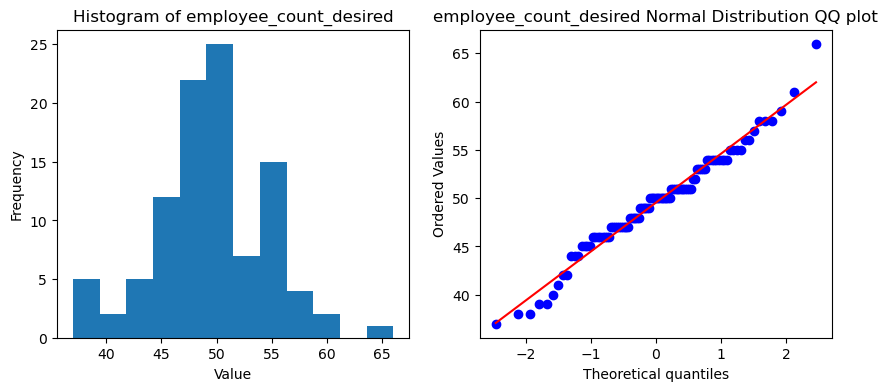

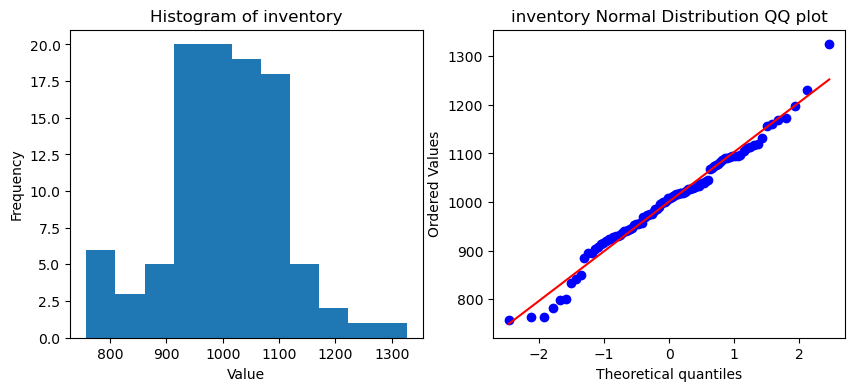

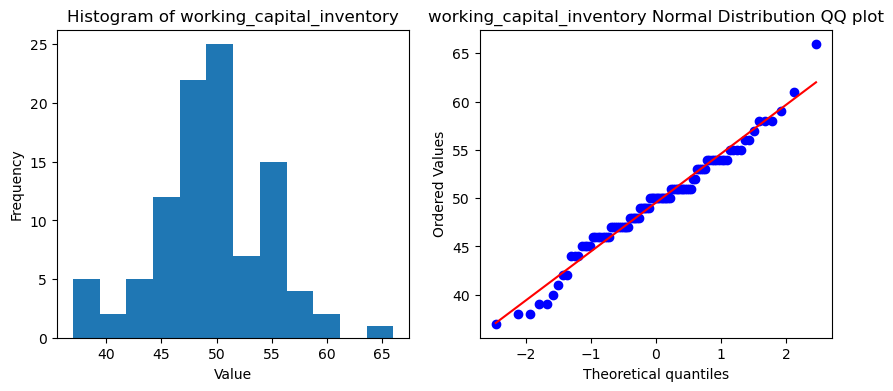

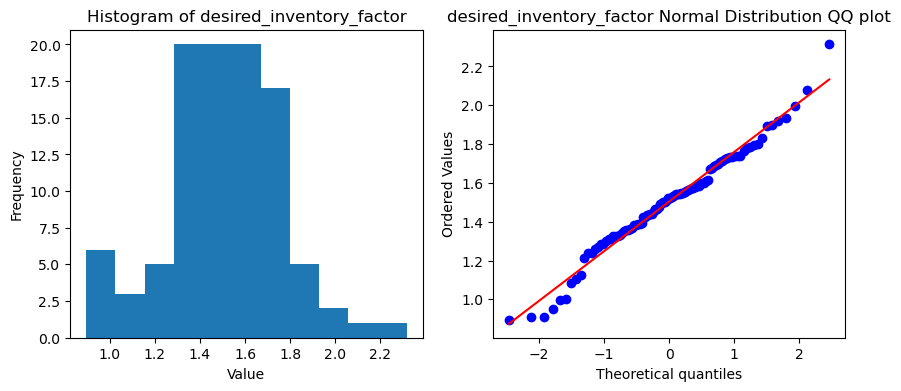

In [20]:
for col_name in df_cap_norm.columns:
    plot_qq_and_hist(df_cap_norm,col_name)